 #  A Whale off the Port(folio)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Read whale returns and set index as "Date"
whale_returns_csv = Path("Resources/whale_returns.csv")

whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Sort index in ascending order
whale_returns_df.sort_index(inplace=True)

# Preview DataFrame
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

# Confirm null values removed
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Read Algorithmic returns and set index as "Date"
algo_returns_csv = Path("Resources/algo_returns.csv")

algo_returns_df = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Sort index in ascending order
algo_returns_df.sort_index(inplace=True)

# Preview DataFrame
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

# Confirm null values removed
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Read S&P500 returns and set index as "Date"
sp500_history_csv = Path("Resources/sp500_history.csv")

sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Sort index in ascending order
sp500_history_df.sort_index(inplace=True)

# Preview DataFrame
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types (convert "Close" column from object to float)

# Remove "$" sign from values in "Close" column and convert data type from "object" to "float"
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "").astype("float")

# Sort index in ascending order
sp500_history_df.sort_index(inplace=True)

# Confirm data type conversion
sp500_history_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)

# Preview DataFrame
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
sp500_daily_returns.columns = ["S&P 500"]
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
daily_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis='columns', join='inner')
daily_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

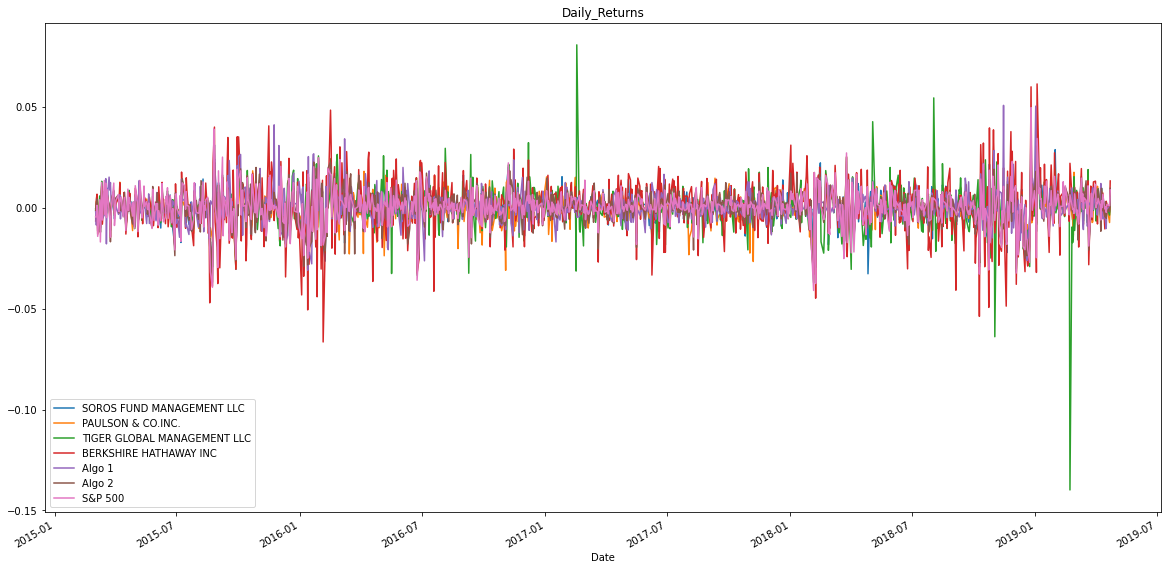

In [15]:
# Plot Daily Returns
daily_returns_df.plot(figsize=(20,10), title="Daily_Returns")

In [16]:
print("Based on the above graph, it appears that the S&P 500 at-large is less volatile than any of the individual portfolios.  Tiger Global Management is the most volatile, with swings much larger than any other portfolio; it may significantly outperform the S&P 500 at times, but at other times, it significantly underperforms the S&P 500.  Berkshire Hathaway also appears to display some volatility, at times outperforming the S&P 500, but not to the extent of Tiger Global.")

Based on the above graph, it appears that the S&P 500 at-large is less volatile than any of the individual portfolios.  Tiger Global Management is the most volatile, with swings much larger than any other portfolio; it may significantly outperform the S&P 500 at times, but at other times, it significantly underperforms the S&P 500.  Berkshire Hathaway also appears to display some volatility, at times outperforming the S&P 500, but not to the extent of Tiger Global.


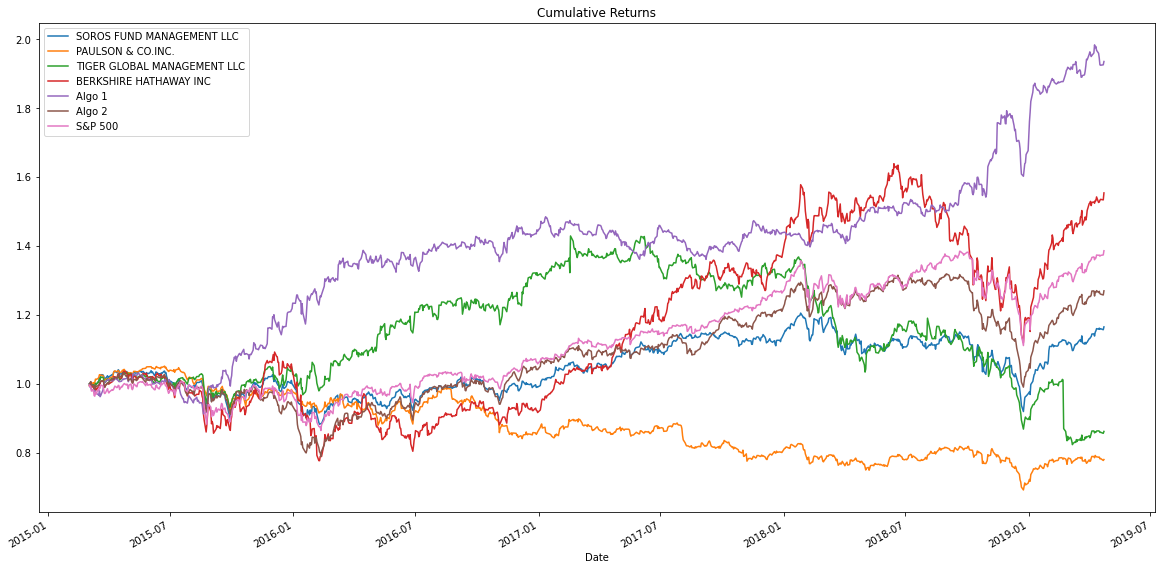

In [17]:
# Plot Cumulative Returns
cumulative_returns = (1 + daily_returns_df).cumprod()
cumulative_returns.plot(figsize = (20,10), title="Cumulative Returns")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

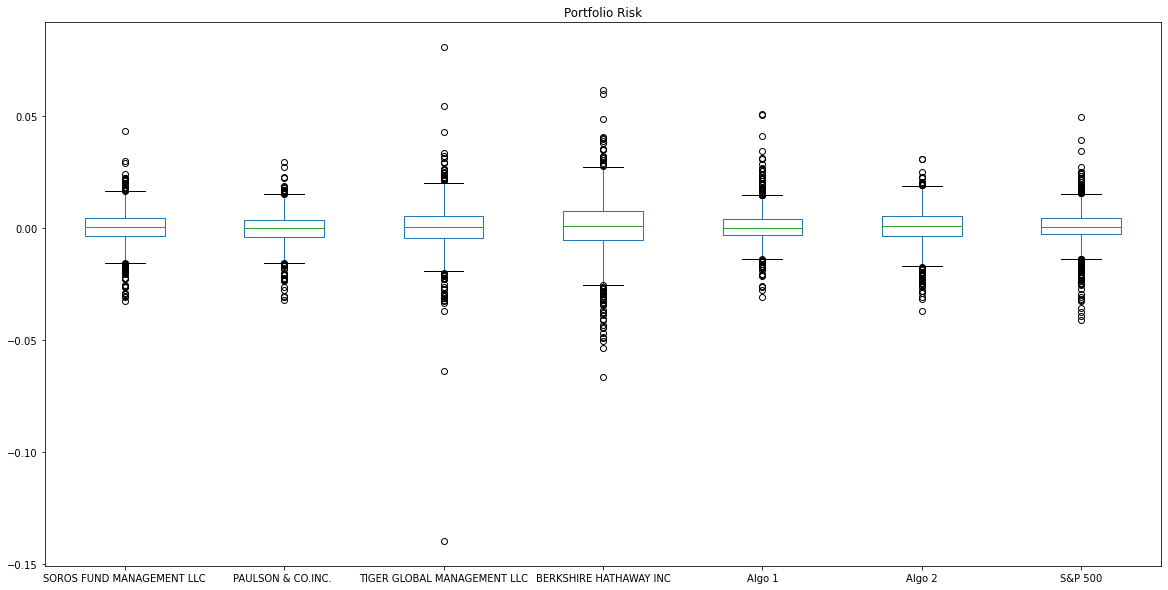

In [18]:
# Box plot to visually show risk

daily_returns_df.plot(kind = "box", figsize = (20,10), title="Portfolio Risk")

In [19]:
print("The largest spread in the above box plot is for the portfolio of Berkshire Hathaway Inc.  The smallest spread in the above box plot is for the portfolio of Paulson & Co. Inc.  It is noted that although Tiger Global Management does not have the largest spread, it does have the greatest outliers.")

The largest spread in the above box plot is for the portfolio of Berkshire Hathaway Inc.  The smallest spread in the above box plot is for the portfolio of Paulson & Co. Inc.  It is noted that although Tiger Global Management does not have the largest spread, it does have the greatest outliers.


In [20]:
# Daily Standard Deviations

# Calculate the standard deviation for each portfolio. 
daily_std_df = pd.DataFrame(daily_returns_df.std()).rename(columns = {0:"Standard_Deviation"})
daily_std_df

,Standard_Deviation
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500,0.008554


In [21]:
# Determine which portfolios are riskier than the S&P 500
higher_std = daily_std_df[daily_std_df["Standard_Deviation"] > daily_std_df.loc["S&P 500", "Standard_Deviation"]]
higher_std

,Standard_Deviation
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [22]:
print("Tiger Global Management LLC and Berkshire Hathaway Inc have higher standard deviations than, and are therefore riskier than, the S&P 500.")

Tiger Global Management LLC and Berkshire Hathaway Inc have higher standard deviations than, and are therefore riskier than, the S&P 500.


In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_df = daily_std_df * np.sqrt(252)

# Rename "Standard_Deviation" column to "Annualized Standard_Deviation"
annualized_std_df.columns = ["Annualized Standard Deviation"]

# Make new DataFrame with sorted data 
annualized_std_df_sorted = annualized_std_df.sort_values("Annualized Standard Deviation")

annualized_std_df_sorted

,Annualized Standard Deviation
PAULSON & CO.INC.,0.111488
Algo 1,0.120967
SOROS FUND MANAGEMENT LLC,0.125335
Algo 2,0.132430
S&P 500,0.135786
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077


## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

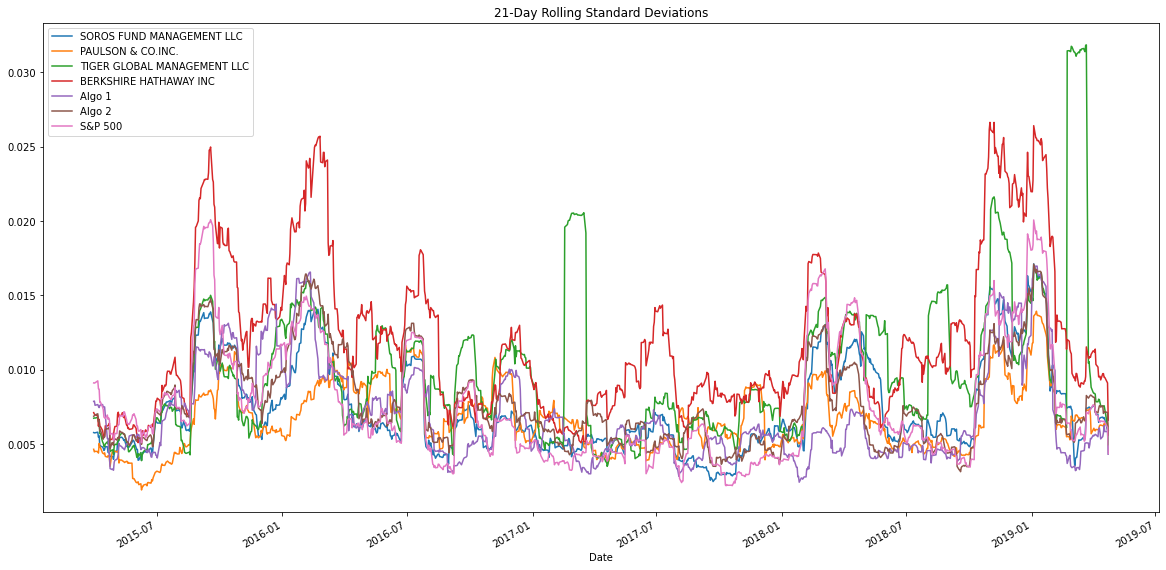

In [24]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

sp500_rolling_std = daily_returns_df.rolling(window=21).std()
sp500_rolling_std.plot(figsize = (20,10), title="21-Day Rolling Standard Deviations")

In [25]:
# Construct a correlation table
correlation = daily_returns_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [26]:
print("Based on the above correlation table, Algo 2 most closely resembles the returns of the S&P 500 at an 85.9% correlation, followed closely by the Soros Fund at 83.8%.  Algo 1 least resembles the returns of the S&P 500, only correlating at 27.9%.")



Based on the above correlation table, Algo 2 most closely resembles the returns of the S&P 500 at an 85.9% correlation, followed closely by the Soros Fund at 83.8%.  Algo 1 least resembles the returns of the S&P 500, only correlating at 27.9%.


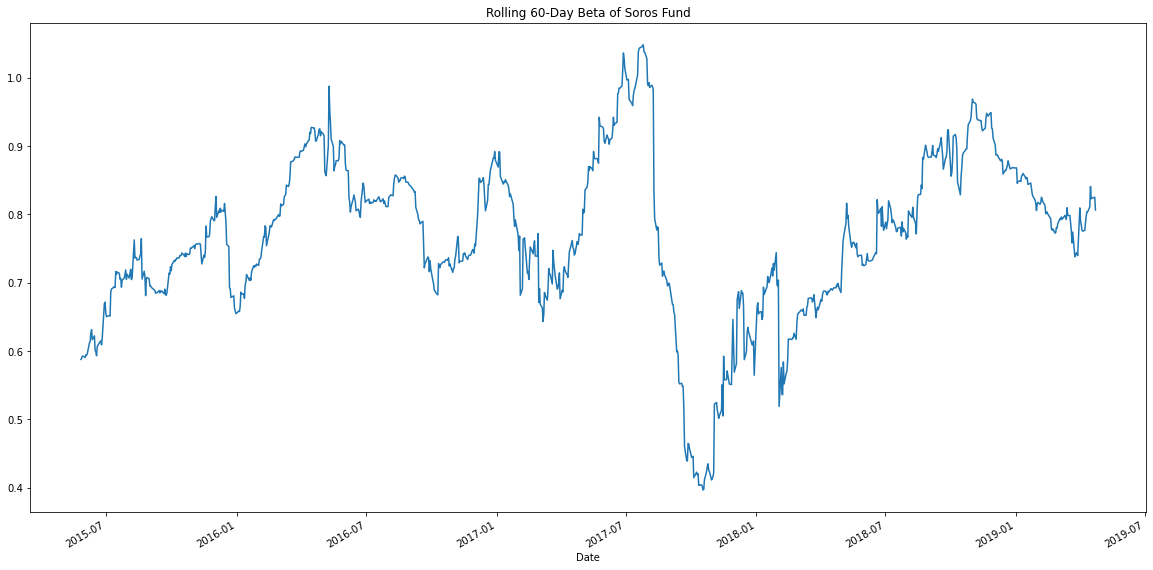

In [27]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

rolling_covariance = daily_returns_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(daily_returns_df['S&P 500'])

rolling_variance = daily_returns_df['S&P 500'].rolling(window=60).var()

rolling_beta = rolling_covariance / rolling_variance

rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Soros Fund')

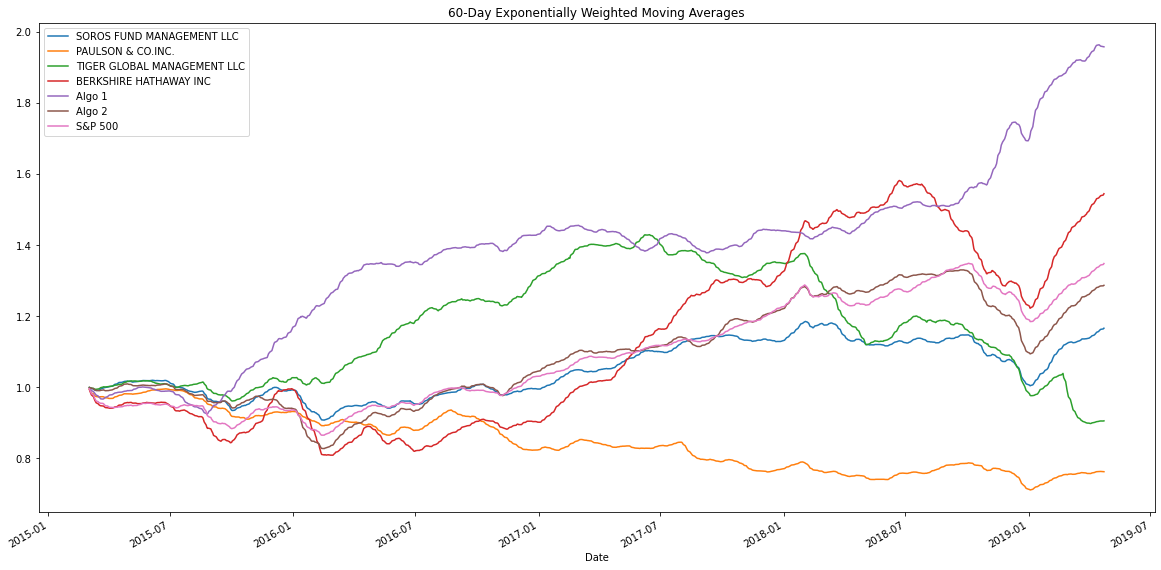

In [28]:
# Calculate a rolling window using the exponentially weighted moving average. 
rolling_ewm = daily_returns_df.ewm(span = 21, adjust = False).mean()
(1 + rolling_ewm).cumprod().plot(figsize = (20,10), title="60-Day Exponentially Weighted Moving Averages")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [29]:
# Calculate annualized Sharpe Ratios
annualized_sharpe_ratios = daily_returns_df.mean()*252/(daily_returns_df.std()*np.sqrt(252))

# Sort Sharpe Ratios
annualized_sharpe_ratios_sorted = annualized_sharpe_ratios.sort_values(ascending=False)

annualized_sharpe_ratios_sorted

Algo 1                         1.378648
S&P 500                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

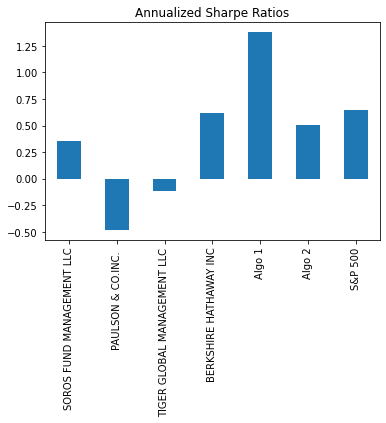

In [30]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind = "bar", title = "Annualized Sharpe Ratios")

On the basis of Sharpe Ratios, Algo 1 outperformed both the market as a whole as well as the "whales."  Algo 2, however, underperformed the market as a whole as well as Berkshire Hathaway.  Both Algo 1 and Algo 2 outperformed Soros Fund Managment, Paulson & Co. and Tiger Global.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Read the first stock
ccl_returns_csv = Path("Resources/ccl_returns.csv")
ccl_df = pd.read_csv(ccl_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Rename column to identify "CCL Close"
ccl_df.columns = ["CCL Close"]
ccl_df.head()

,CCL Close
Date,
2018-01-02,66.75
2018-01-03,66.90
2018-01-04,66.85
2018-01-05,66.30
2018-01-08,66.05


In [32]:
# Read the second stock
gild_returns_csv = Path("Resources/gild_returns.csv")
gild_df = pd.read_csv(gild_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Rename column to identify "GILD Close"
gild_df.columns = ["GILD Close"]
gild_df.head()

,GILD Close
Date,
2018-01-02,74.10
2018-01-03,74.66
2018-01-04,73.90
2018-01-05,74.52
2018-01-08,74.40


In [33]:
# Read the third stock
twtr_returns_csv = Path("Resources/twtr_returns.csv")
twtr_df = pd.read_csv(twtr_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Rename column to identify "TWTR Close"
twtr_df.columns = ["TWTR Close"]
twtr_df.head()

,TWTR Close
Date,
2018-01-02,24.51
2018-01-03,24.45
2018-01-04,23.99
2018-01-05,24.32
2018-01-08,24.59


In [34]:
# Concatenate all stocks into a single DataFrame
my_stocks_df = pd.concat([ccl_df, gild_df, twtr_df], axis='columns', join='inner')

# Sort new dataframe
my_stocks_df.sort_index(ascending = True, inplace = True)

my_stocks_df.head()

,CCL Close,GILD Close,TWTR Close
Date,,,
2018-01-02,66.75,74.10,24.51
2018-01-03,66.90,74.66,24.45
2018-01-04,66.85,73.90,23.99
2018-01-05,66.30,74.52,24.32
2018-01-08,66.05,74.40,24.59


In [35]:
# Reset the index
my_stocks_df.index = my_stocks_df.index.normalize()

In [36]:
# Pivot so that each column of prices represents a unique symbol
print("Not necessary as each individual DataFrame already represents a unique symbol's prices, and these DataFrames were concatenated by 'column.'  New concatenated DataFrame looks good as is.")

Not necessary as each individual DataFrame already represents a unique symbol's prices, and these DataFrames were concatenated by 'column.'  New concatenated DataFrame looks good as is.


In [37]:
# Drop Nulls
my_stocks_df.dropna(inplace=True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
weights = [1/3, 1/3, 1/3]
my_portfolio_returns = my_stocks_df.pct_change().dot(weights)
my_portfolio_returns.dropna(inplace=True)
my_portfolio_returns.head()

Date
2018-01-03    0.002452
2018-01-04   -0.009914
2018-01-05    0.004639
2018-01-08    0.001907
2018-01-09    0.018857
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
total_portfolio_returns_df = pd.concat([my_portfolio_returns, daily_returns_df], axis='columns', join='inner')
total_portfolio_returns_df.rename(columns = {0:"CCL/GILD/TWTR"}, inplace = True)
total_portfolio_returns_df.head()

,CCL/GILD/TWTR,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2018-01-03,0.002452,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399
2018-01-04,-0.009914,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029
2018-01-05,0.004639,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034
2018-01-08,0.001907,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-09,0.018857,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_portfolio_returns_df.dropna(inplace=True)
total_portfolio_returns_df.head()

,CCL/GILD/TWTR,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2018-01-03,0.002452,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399
2018-01-04,-0.009914,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029
2018-01-05,0.004639,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034
2018-01-08,0.001907,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662
2018-01-09,0.018857,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [41]:
# Risk
total_portfolio_std = pd.DataFrame(total_portfolio_returns_df.std()).rename(columns = {0:"Standard Deviation"})
total_portfolio_std

,Standard Deviation
CCL/GILD/TWTR,0.017183
SOROS FUND MANAGEMENT LLC,0.009939
PAULSON & CO.INC.,0.007434
TIGER GLOBAL MANAGEMENT LLC,0.012507
BERKSHIRE HATHAWAY INC,0.015165
Algo 1,0.007563
Algo 2,0.009004
S&P 500,0.010750


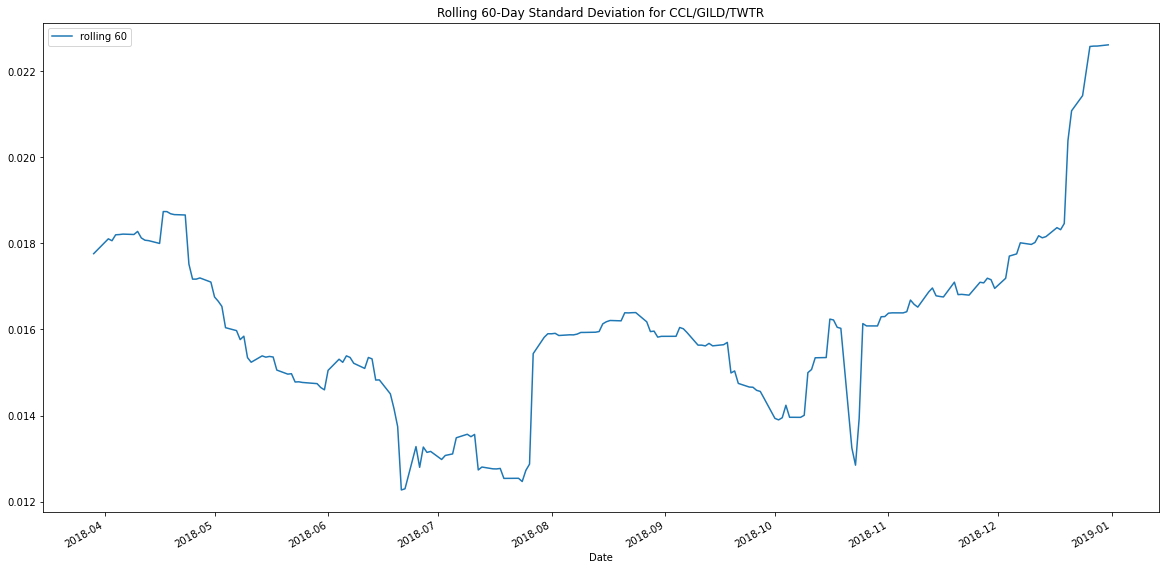

In [42]:
# Rolling
my_portfolio_rolling = total_portfolio_returns_df[["CCL/GILD/TWTR"]].rolling(window = 60).std()
ax = my_portfolio_rolling.plot(figsize = (20,10), title = 'Rolling 60-Day Standard Deviation for CCL/GILD/TWTR')
ax.legend(["rolling 60"]);

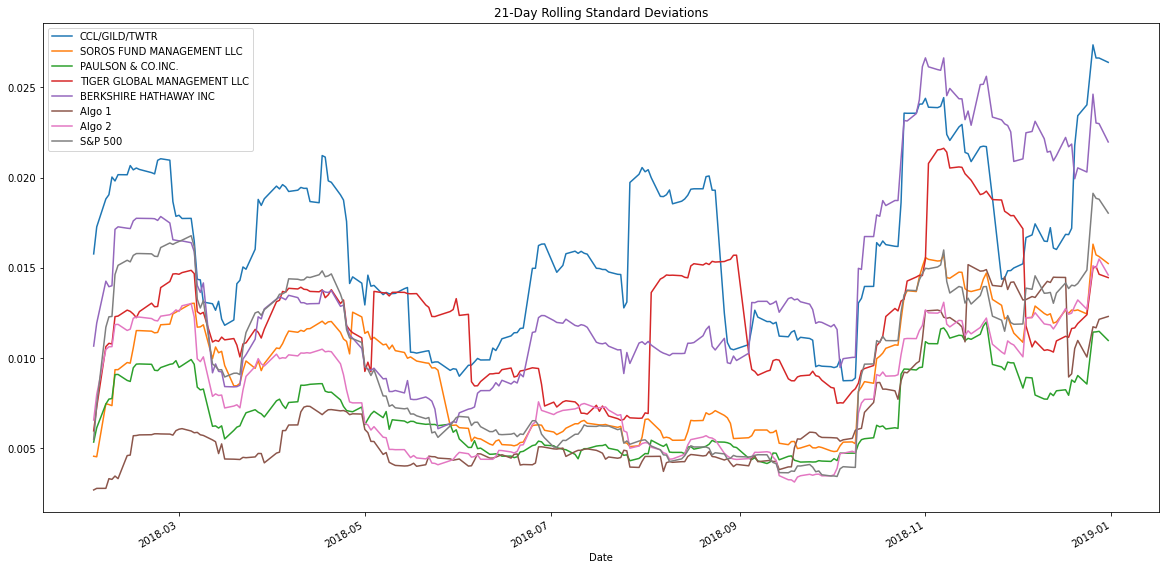

In [43]:
# Rolling
portfolio_rolling_std = total_portfolio_returns_df.rolling(window=21).std()
portfolio_rolling_std.plot(figsize = (20,10), title="21-Day Rolling Standard Deviations")

In [44]:
# Annualized Sharpe Ratios
my_portfolio_annualized_sharpe_ratios = total_portfolio_returns_df.mean()*252/(total_portfolio_returns_df.std()*np.sqrt(252))

# Sort Sharpe Ratios
my_portfolio_annualized_sharpe_ratios_sorted = my_portfolio_annualized_sharpe_ratios.sort_values(ascending=False)

# Drop Nulls
my_portfolio_annualized_sharpe_ratios_sorted.dropna(inplace=True)

my_portfolio_annualized_sharpe_ratios_sorted

Algo 1                         1.337491
CCL/GILD/TWTR                 -0.091345
S&P 500                       -0.343933
BERKSHIRE HATHAWAY INC        -0.581264
SOROS FUND MANAGEMENT LLC     -1.001733
PAULSON & CO.INC.             -1.076391
Algo 2                        -1.123964
TIGER GLOBAL MANAGEMENT LLC   -1.816443
dtype: float64

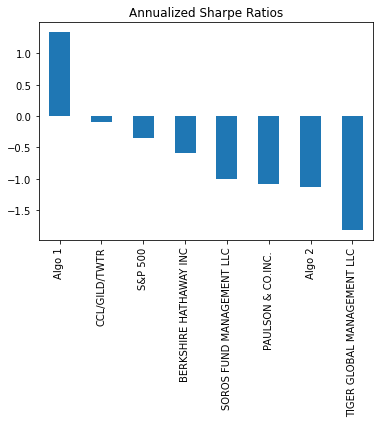

In [45]:
# Visualize the sharpe ratios as a bar plot
my_portfolio_annualized_sharpe_ratios_sorted.plot(kind = "bar", title = "Annualized Sharpe Ratios")

In [46]:
# Create a correlation analysis
correlation = total_portfolio_returns_df.corr()
correlation

,CCL/GILD/TWTR,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
CCL/GILD/TWTR,1.000000,0.667621,0.569078,0.452211,0.718007,0.241448,0.695893,0.684237
SOROS FUND MANAGEMENT LLC,0.667621,1.000000,0.785223,0.615549,0.802833,0.381654,0.846903,0.858390
PAULSON & CO.INC.,0.569078,0.785223,1.000000,0.663716,0.678808,0.360494,0.817367,0.816676
TIGER GLOBAL MANAGEMENT LLC,0.452211,0.615549,0.663716,1.000000,0.501406,0.186736,0.619016,0.702874
BERKSHIRE HATHAWAY INC,0.718007,0.802833,0.678808,0.501406,1.000000,0.374323,0.800103,0.837869
Algo 1,0.241448,0.381654,0.360494,0.186736,0.374323,1.000000,0.362932,0.324546
Algo 2,0.695893,0.846903,0.817367,0.619016,0.800103,0.362932,1.000000,0.895958
S&P 500,0.684237,0.858390,0.816676,0.702874,0.837869,0.324546,0.895958,1.000000


In [47]:
print("Based on the above correlation table, the returns of CCL/GILD/TWTR most closely resemble the returns of Berkshire Hathaway Inc at 71.8%; they least closely resemble the returns of Algo 1 at only 24.1%.")

Based on the above correlation table, the returns of CCL/GILD/TWTR most closely resemble the returns of Berkshire Hathaway Inc at 71.8%; they least closely resemble the returns of Algo 1 at only 24.1%.


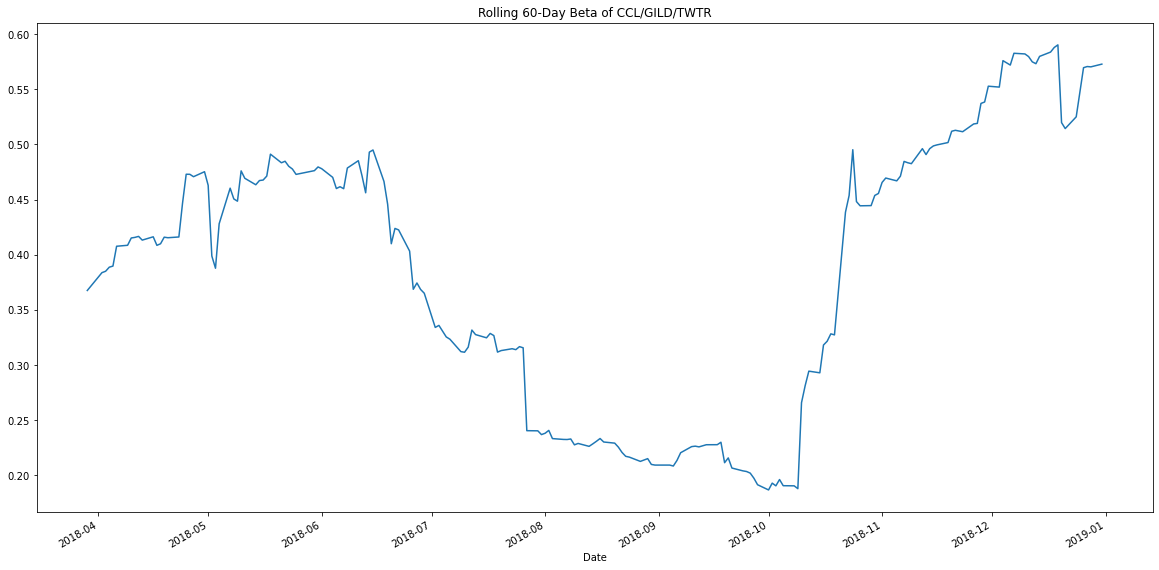

In [48]:
# Beta
rolling_covariance = total_portfolio_returns_df['CCL/GILD/TWTR'].rolling(window=60).cov(total_portfolio_returns_df['S&P 500'])

rolling_variance = total_portfolio_returns_df['CCL/GILD/TWTR'].rolling(window=60).var()

rolling_beta = rolling_covariance / rolling_variance

rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of CCL/GILD/TWTR')